# Climate model
```{index} Climate model (1D)
```
## An energy balance model

The **energy flux density at the surface of the Earth** can be calculated from the inverse square law, given the power of the Sun $E_s=3.86\times 10^{26}$ W and the distance between the Sun and the Earth $R=1.5\times 10^{11}$ m: 

$$S_o=\frac{E_S}{4\pi R^{2}}.$$

This is the **solar constant** $S_o$, which is roughly 1365 Wm$^{-2}$.

Energy balance model is crucial in building a climate model, since atmospheric dynamics is driven by the input of energy into the climate system. 

```{admonition} Assumptions about the Earth
1. It is a perfect blackbody
2. Its albedo is 0.3, which is the average terrestrial albedo
3. It is in radiative equilibrium, i.e. energy in = energy out
4. Equal solar irradiation on the surface of the Earth
```

Recall that albedo ($\alpha$) is the **reflectance of an object over all wavelengths**, which measures how well a surface reflects EM radiation. We already know the energy flux density at the surface of the Earth = the solar constant $S_o$. Thus, the energy flux density (Wm$^{-2}$) into the Earth is:

$$M_{in}=S_o(1-\alpha).$$ 

In terms of total energy flux ($W$):

$$E_{in}=S_o\pi R_E^2(1-\alpha),$$

where $R_E$ is the radius of the Earth.

The energy flux density emitted is described by Stefan-Boltzmann Law:

$$M_{out}=\sigma T_K^{4},$$

where $\sigma$ is Stefan-Boltzmann constant and $\sigma = 5.67$x$10^{-8}$ Wm$^{-2}K^{-4}$, and $T_K$ is the **absolute temperature**. 

In terms of total energy flux:

$$E_{out}=4\pi R_E^2\sigma T_K^{4}.$$

At **radiative equilibrium**, energy absorbed = energy emitted, thus:

$$E_{in}=E_{out},$$

$$S_o\pi R_E^2(1-\alpha)=4\pi R_E^{2}\sigma T_K^{4},$$

$$\frac{1}{4}S_o(1-\alpha)=\sigma T_K^{4}.$$ 

Recall $\sigma T_K^{4}=M_{out}$, thus $\frac{1}{4}S_o(1-\alpha)=M_{in}$ at radiative equilibrium.

Rearranging for $T_K$:

$$T_K=\Big(\frac{S_o(1-\alpha)}{4\sigma}\Big)^{\frac{1}{4}}.$$

Substituting $\alpha = 0.3$, the temperature on the surface of the Earth is **-18˚C**.

In [2]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# define a function to calculate temperature in degrees Celsius for a given albedo
# al = albedo, s = stefan-boltzmann constant, S_o = solar constant
def find_temp(al, S_o=1365, s=5.67e-8):
    return ((S_o*(1-al))/(4*s))**0.25-273

print("When albedo = %.1f, surface temperature on Earth would be %.d˚C." % (0.3, find_temp(0.3)))

When albedo = 0.3, surface temperature on Earth would be -18˚C.


The average temperature on Earth is around <b>14˚C</b>, so something in the model must be wrong - some of the assumptions are not valid and are too simple.

#### Assumption 1 

The Earth is not a perfect blackbody because it doesn't radiate perfectly.

#### Assumption 2 

Albedo = 0.3 is pretty accurate. As you'll see below, after accounting for the Earth being an imperfect blackbody, the calculated surface temperature is very sensible.

#### Assumption 3

Equilibrium is easily disturbed, especially by <b>positive feedbacks</b>.

#### Assumption 4 

The Earth is a sphere, so heat absorbtion (and heat emission) is not uniform.

## Emissivity

To improve the model and address assumption 1, <b>emissivity $\varepsilon$</b> is introduced to describe the <b>difference in the range of radiation emitted between the object and an ideal black body</b>.

Including this 'fudge factor', Stefan-Boltzmann Law becomes:

$$M_{out}=\varepsilon\sigma T_K^{4}$$

Since $M_{in}=M_{out}$,

$$\frac{1}{4}S_o(1-\alpha)=\varepsilon\sigma T_K^{4},$$

$$T_K=(\frac{S_o(1-\alpha)}{4\varepsilon\sigma})^{\frac{1}{4}}.$$

It is found that the emissivity of the Earth is 0.62, and substituting this into the equation gives 14˚C, proving that albedo = 0.3 is a valid assumption.

In [5]:
# define a function to find the temperature with a given emissivity
# e = emissivity

def find_new_temp(al, S_o=1365, e=0.62, s=5.67e-8):
    return ((S_o*(1-al))/(4*e*s))**0.25-273

print("Including emissivity, with albedo of 0.3, temperature on Earth would be %.d˚C." % \
      (find_new_temp(0.3)))

# make an array of values of albedo between 0 and 1
albedo = np.array([0.01*i for i in range(101)])

# calculate temperature with different albedo
new_temp = find_new_temp(albedo)

Including emissivity, with albedo of 0.3, temperature on Earth would be 14˚C.


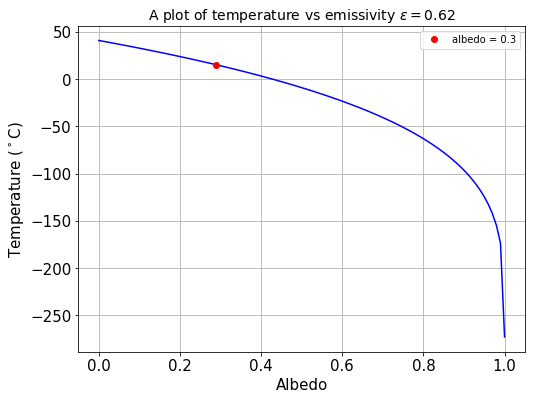

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

# plot figure
plt.figure(figsize=(8,6))
plt.plot(albedo, new_temp, 'b')
plt.plot(albedo[29], new_temp[29], 'ro', label='albedo = %.1f' % (albedo[29])) 
plt.xlabel('Albedo')
plt.ylabel('Temperature ($^\circ$C)')
plt.title(r'A plot of temperature vs emissivity $\varepsilon = 0.62$', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True)
plt.show()

## Conclusion

This model is still very crude, since plenty of things are still not taken into account, such as greenhouse effect, clouds, position of continents, vegetation, positive and negative feedbacks, etc. 

In a real climate model, other factors also have to be included such as atmospheric dynamics, climate variability like ENSO, human influence, etc.

However, this example shows how scientists build climate models by using equations from physics, making approximations and assumptions, including parameters to account for any variability, and adjusting the values of parameters so that it resembles the real world when it is run.

For more information about how other factors are accounted for in a model, including greenhouse effect and positive feedbacks, you can visit the [New York University Maths Department website](https://math.nyu.edu/faculty/kleeman/zero_dim_ebm.html).

## References

- Practical 1 of the Climate module